In [44]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

In [45]:
pd.set_option('display.max_columns', None)
df_manila = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\manila_weather_2014-2024.csv")

In [46]:
#sort index
df_manila = df_manila.sort_index()

## Descriptive statistics and EDA

In [47]:
df_manila.shape

(3793, 34)

In [48]:
df_manila.columns

Index(['Unnamed: 0', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

In [49]:
df_manila['datetime'].min()

'2014-01-01'

In [50]:
df_manila['datetime'].max()

'2024-05-20'

In [51]:
df_manila['temp'].min()

22.4

In [52]:
df_manila['temp'].max()

32.9

In [53]:
df_manila.dtypes

Unnamed: 0            int64
name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [54]:
df_manila.isna().sum()

Unnamed: 0             0
name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1273
snow                 365
snowdepth            365
windgust             308
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [55]:
print(df_manila.head())

   Unnamed: 0                 name    datetime  tempmax  tempmin  temp  \
0           0  Manila, Phillipines  2014-01-01     31.0     23.0  26.6   
1           1  Manila, Phillipines  2014-01-02     31.0     23.6  27.0   
2           2  Manila, Phillipines  2014-01-03     31.0     22.0  26.7   
3           3  Manila, Phillipines  2014-01-04     30.0     23.0  26.7   
4           4  Manila, Phillipines  2014-01-05     30.0     23.0  26.5   

   feelslikemax  feelslikemin  feelslike   dew  humidity  precip  precipprob  \
0          32.7          23.0       27.4  20.4      70.1     0.0           0   
1          33.1          23.6       27.9  20.0      66.2     0.0           0   
2          33.7          22.0       27.9  20.6      70.2     0.0           0   
3          33.6          23.0       28.0  21.8      75.9     0.0           0   
4          32.7          23.0       27.7  21.6      75.3     0.0           0   

   precipcover preciptype  snow  snowdepth  windgust  windspeed  winddir  

In [56]:
print(df_manila.describe())

        Unnamed: 0      tempmax      tempmin         temp  feelslikemax  \
count  3793.000000  3793.000000  3793.000000  3793.000000   3793.000000   
mean   1896.000000    32.116926    25.479541    28.475270     37.866359   
std    1095.089114     2.115698     1.548622     1.500248      3.780862   
min       0.000000    24.000000    11.900000    22.400000     24.000000   
25%     948.000000    31.000000    24.800000    27.400000     35.300000   
50%    1896.000000    32.000000    25.700000    28.500000     38.100000   
75%    2844.000000    33.300000    26.500000    29.500000     40.500000   
max    3792.000000    64.400000    29.400000    32.900000     64.600000   

       feelslikemin    feelslike          dew     humidity       precip  \
count   3793.000000  3793.000000  3793.000000  3793.000000  3793.000000   
mean      26.314237    31.932270    23.398866    75.303296     5.342031   
std        2.875907     3.178143     2.060556     9.116238    13.935942   
min       11.900000    2

In [57]:
print(df_manila.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3793 non-null   int64  
 1   name              3793 non-null   object 
 2   datetime          3793 non-null   object 
 3   tempmax           3793 non-null   float64
 4   tempmin           3793 non-null   float64
 5   temp              3793 non-null   float64
 6   feelslikemax      3793 non-null   float64
 7   feelslikemin      3793 non-null   float64
 8   feelslike         3793 non-null   float64
 9   dew               3793 non-null   float64
 10  humidity          3793 non-null   float64
 11  precip            3793 non-null   float64
 12  precipprob        3793 non-null   int64  
 13  precipcover       3793 non-null   float64
 14  preciptype        2520 non-null   object 
 15  snow              3428 non-null   float64
 16  snowdepth         3428 non-null   float64


In [58]:
print(df_manila.isnull().sum())

Unnamed: 0             0
name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1273
snow                 365
snowdepth            365
windgust             308
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64


In [59]:
df_manila.dtypes

Unnamed: 0            int64
name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

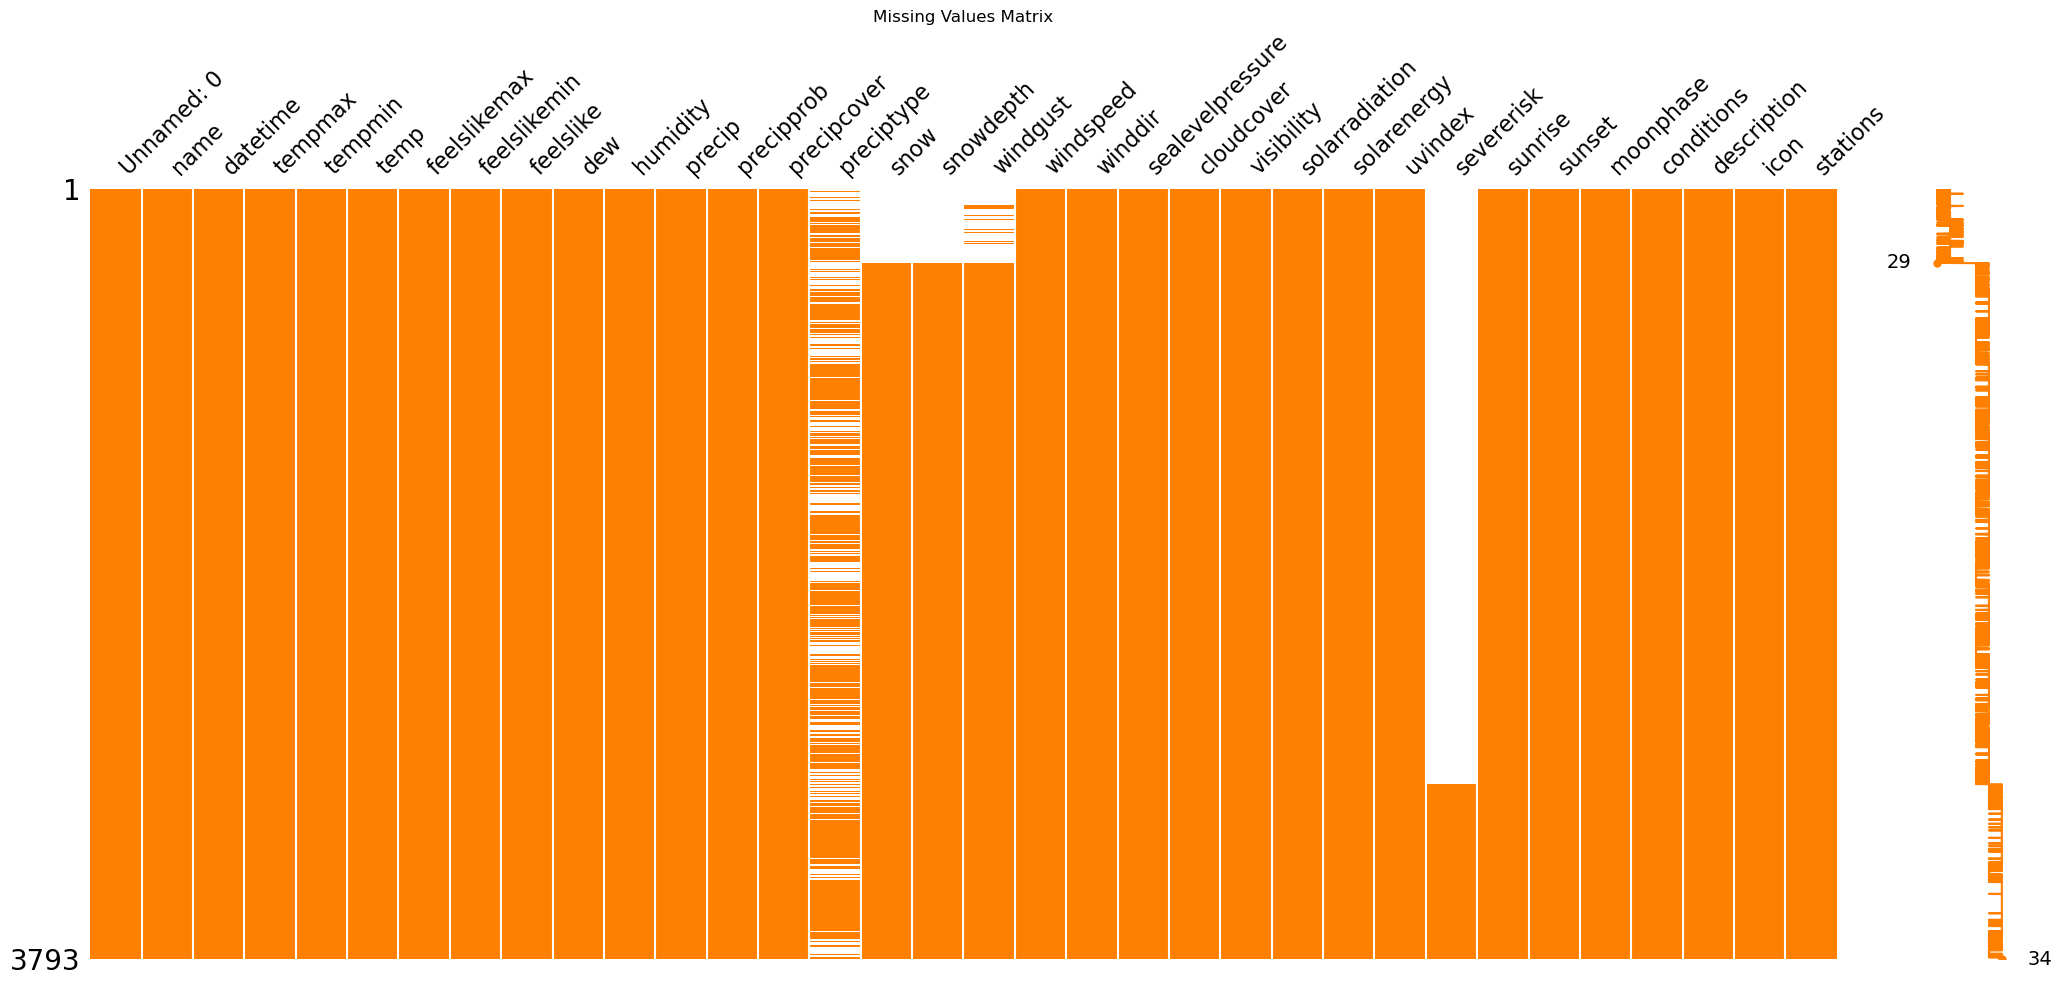

In [60]:
import missingno as msno
msno.matrix(df_manila, color=(1.0, 0.5, 0.0))
plt.title('Missing Values Matrix')
plt.show()

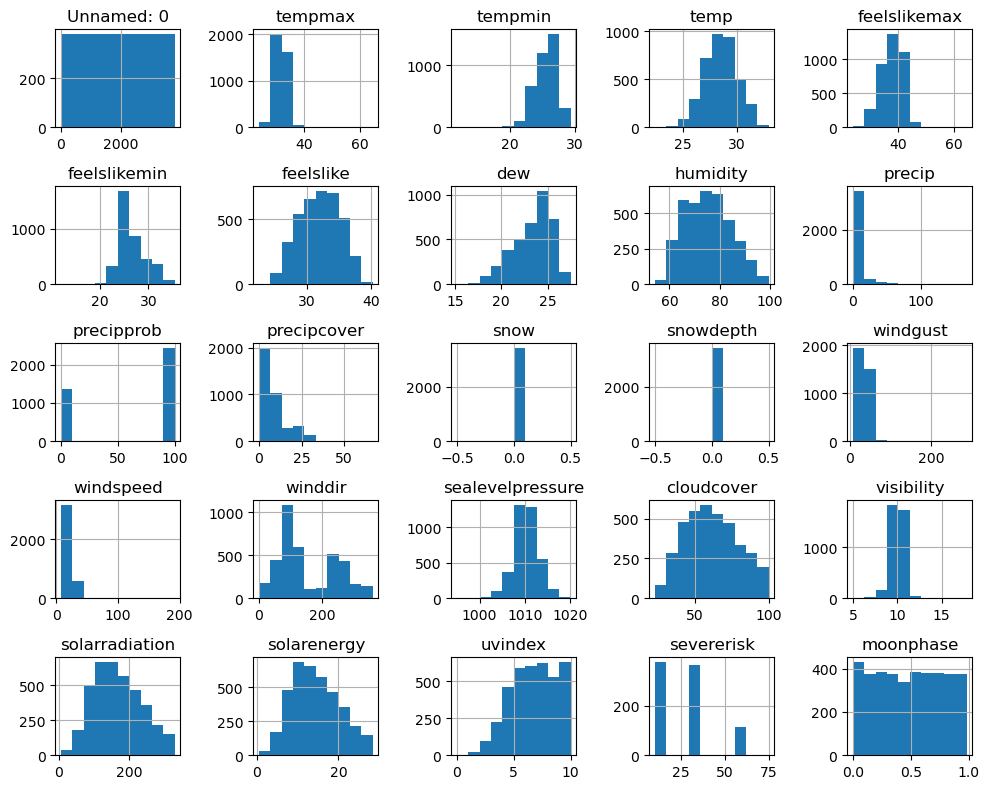

In [61]:
df_manila.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

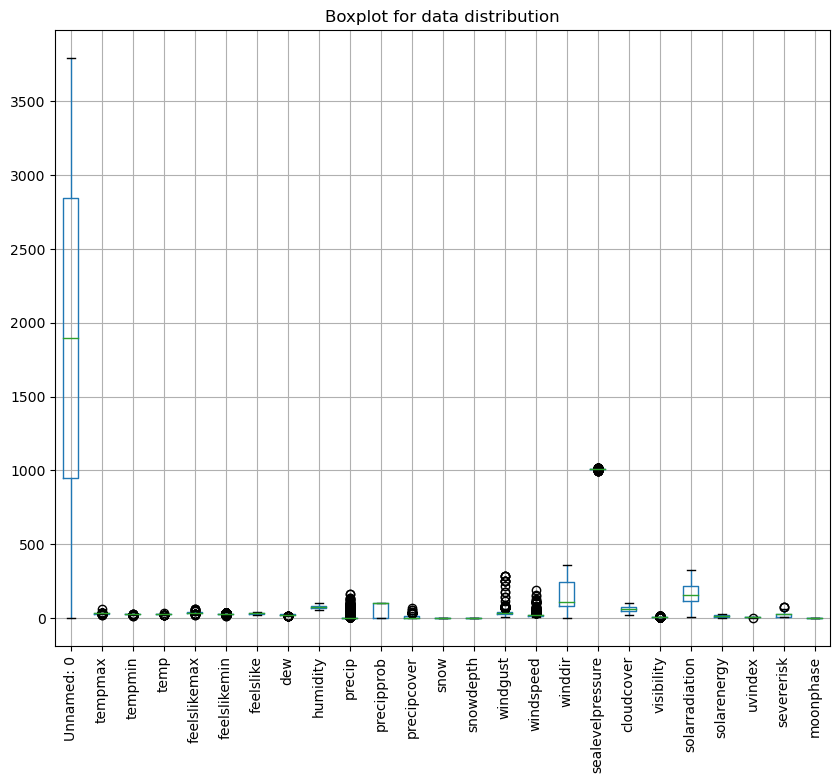

In [62]:
df_manila.boxplot(figsize=(10, 8))
plt.xticks(rotation=90)
plt.title('Boxplot for data distribution')
plt.show()

In [63]:
corr_matrix = df_manila.corr()
print(corr_matrix) 

                  Unnamed: 0   tempmax   tempmin      temp  feelslikemax  \
Unnamed: 0          1.000000  0.073401  0.072755  0.102779      0.100513   
tempmax             0.073401  1.000000  0.531833  0.857919      0.734636   
tempmin             0.072755  0.531833  1.000000  0.782801      0.658114   
temp                0.102779  0.857919  0.782801  1.000000      0.803989   
feelslikemax        0.100513  0.734636  0.658114  0.803989      1.000000   
feelslikemin        0.038257  0.516196  0.915275  0.749019      0.622761   
feelslike           0.079036  0.706065  0.807222  0.917147      0.892892   
dew                 0.002118  0.120383  0.527212  0.354716      0.653242   
humidity           -0.090969 -0.470913 -0.024412 -0.343982      0.091413   
precip              0.005658 -0.234015 -0.099843 -0.209983     -0.011644   
precipprob          0.044666 -0.186091  0.101496 -0.086231      0.175619   
precipcover         0.014618 -0.361348 -0.033705 -0.277852      0.031192   
snow        

C:\Users\nicol\AppData\Local\Temp\ipykernel_32632\3710571630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_manila.corr()


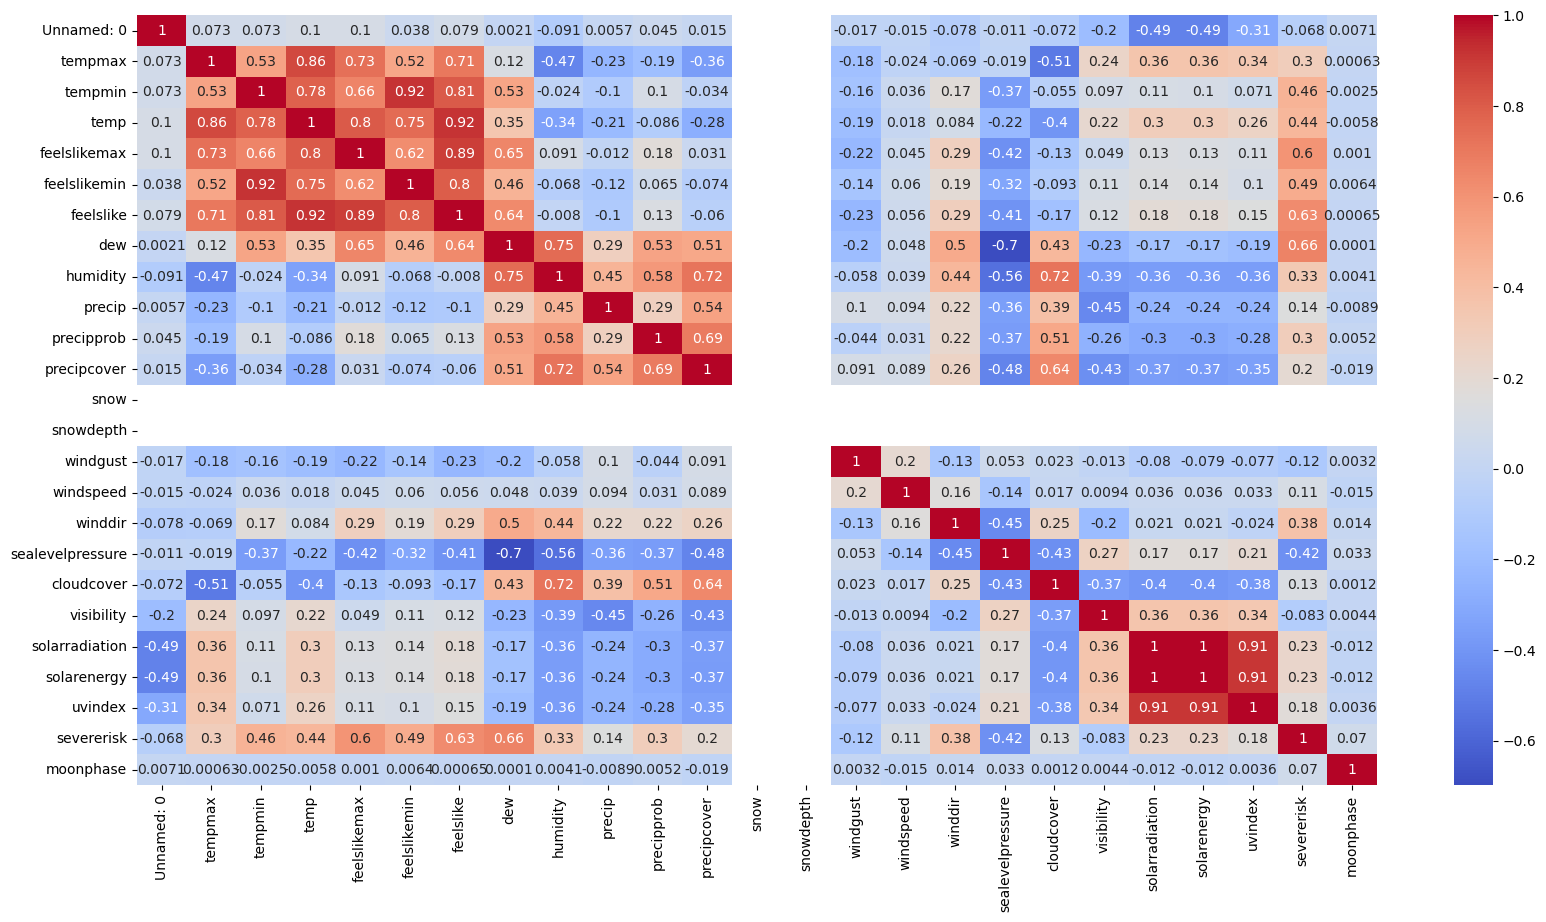

In [64]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

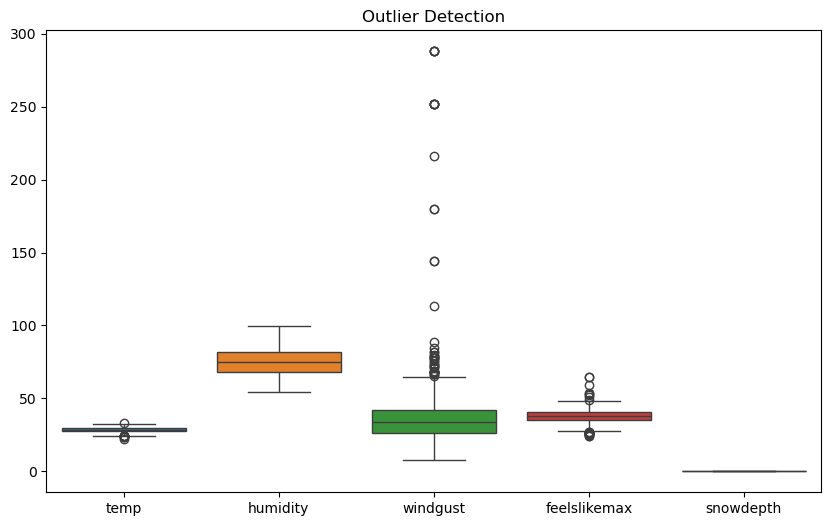

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_manila[['temp', 'humidity', 'windgust', 'feelslikemax', 'snowdepth']])
plt.title("Outlier Detection")
plt.show()

## Missing values

In [66]:
#run k-nn to fill in the missing values with the k nearest neighbour 
#https://www.sciencedirect.com/science/article/abs/pii/S0164121212001586#:~:text=kNN%20imputation%20is%20designed%20to,or%20attribute)%20is%20categorical%2C%20referred

imputer = KNNImputer(n_neighbors=5)
df_manila[['windgust', 'severerisk']] = imputer.fit_transform(df_manila[['windgust', 'severerisk']])


In [67]:
df_manila['preciptype'].unique()

array([nan, 'rain'], dtype=object)

In [68]:
df_manila['preciptype'].value_counts()

rain    2520
Name: preciptype, dtype: int64

In [69]:
df_manila.isna().sum()

Unnamed: 0             0
name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1273
snow                 365
snowdepth            365
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [70]:
#using forward fill to fill in categorical missing data for the preciptype column

df_manila['preciptype'].fillna(method='ffill', inplace=True)

In [71]:
#using backward fill to fill in categorical missing data for the preciptype column

df_manila['preciptype'] = df_manila['preciptype'].fillna(method='bfill')
df_manila['snow'] = df_manila['snow'].fillna(method='bfill')
df_manila['snowdepth'] = df_manila['snowdepth'].fillna(method='bfill')

In [72]:
df_manila.isna().sum()

Unnamed: 0          0
name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

## Droppping unnecessary columns

In [73]:
columns_to_drop = ['Unnamed: 0',  'tempmax', 'tempmin', 'icon', 'stations', 'conditions' ]
df_manila = df_manila.drop(columns=columns_to_drop)

## Tokenization of the preciptype column

In [74]:
# step 1: Text processing
tokenizer = CountVectorizer()
hashingTF = TfidfTransformer(use_idf=False)
idf = TfidfTransformer(use_idf=True)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

In [75]:
# pipeline that processes text and then clusters
pipeline = Pipeline(steps=[
    ('tokenizer', tokenizer),
    ('hashingTF', hashingTF),
    ('idf', idf),
    ('kmeans', kmeans)
])

In [76]:
# fitting the model on the 'Occupation' column
text_features = pipeline.fit_transform(df_manila['preciptype'])

C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [77]:
df_manila['preciptype_clusters'] = kmeans.labels_
df_manila['preciptype_clusters'].value_counts()

0    3793
Name: preciptype_clusters, dtype: int64

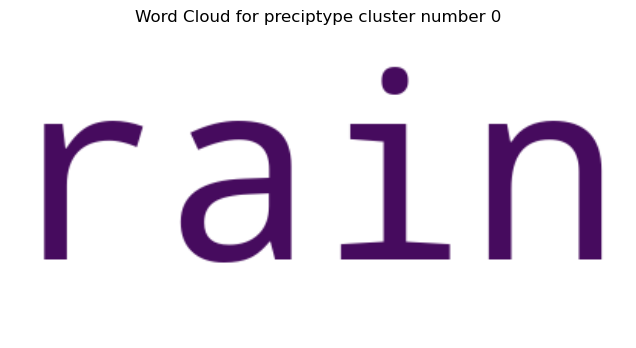

In [78]:
text = ' '.join(description for description in df_manila[df_manila['preciptype_clusters']==0]['preciptype'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for preciptype cluster number 0')
plt.show()

In [80]:
# text = ' '.join(description for description in df_manila[df_manila['preciptype_clusters']==1]['preciptype'])
# wordcloud = WordCloud(background_color='white').generate(text)
# plt.figure(figsize=(8, 4))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for preciptype cluster number 1')
# plt.show()

In [82]:
# text = ' '.join(description for description in df_manila[df_manila['preciptype_clusters']==2]['preciptype'])
# wordcloud = WordCloud(background_color='white').generate(text)
# plt.figure(figsize=(8, 4))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for preciptype cluster number 2')
# plt.show()

In [96]:
# df_manila['preciptype_clusters'].value_counts()

In [97]:
# df_manila = df_manila.drop(columns=['preciptype'])

## Tokenization of the "description" column

In [84]:
# step 1: text processing
tokenizer = CountVectorizer()
hashingTF = TfidfTransformer(use_idf=False)
idf = TfidfTransformer(use_idf=True)
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)

In [85]:
# pipeline that processes text and then clusters
pipeline = Pipeline(steps=[
    ('tokenizer', tokenizer),
    ('hashingTF', hashingTF),
    ('idf', idf),
    ('kmeans', kmeans)
])

In [86]:
# fitting the model on the 'Short description' column
text_features = pipeline.fit_transform(df_manila['description'])

C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [87]:
kmeans.labels_
df_manila['clusters_description'] = kmeans.labels_

In [88]:
df_manila['clusters_description'].value_counts()

1    1316
2    1037
3     486
4     418
0     288
5     248
Name: clusters_description, dtype: int64

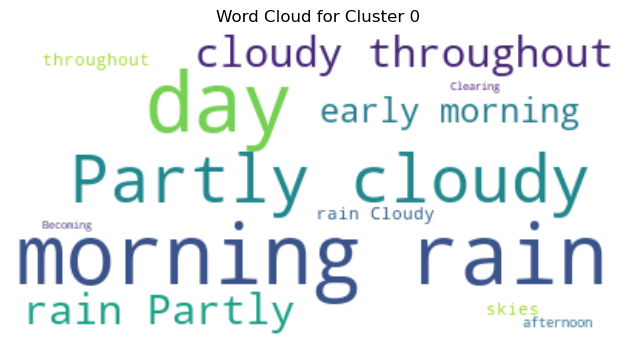

In [89]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==0]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 0')
plt.show()

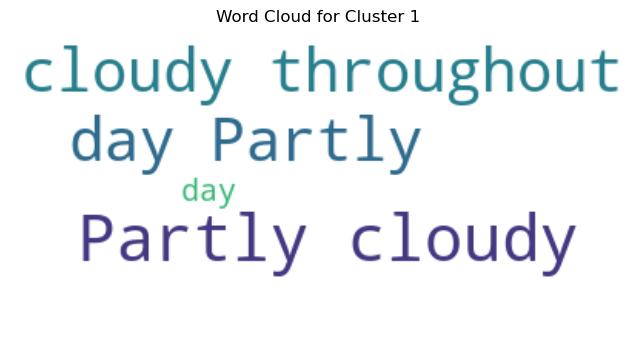

In [90]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==1]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 1')
plt.show()

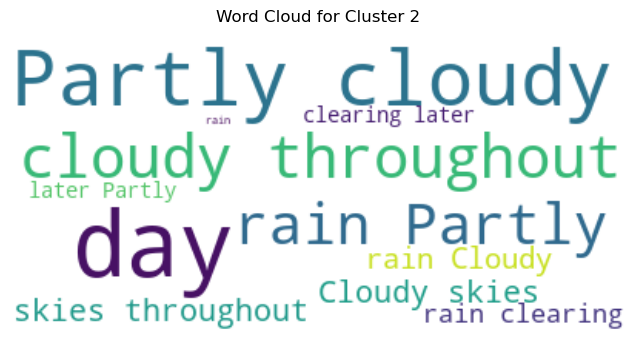

In [91]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==2]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 2')
plt.show()

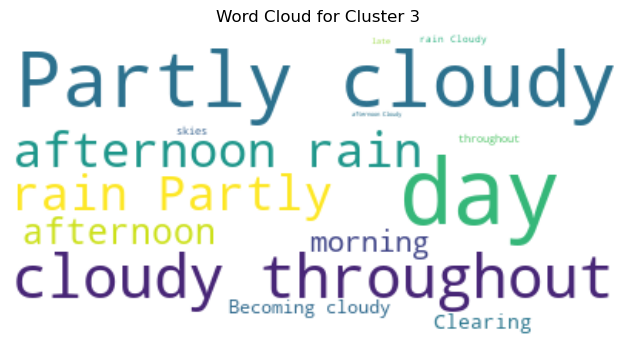

In [92]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==3]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 3')
plt.show()

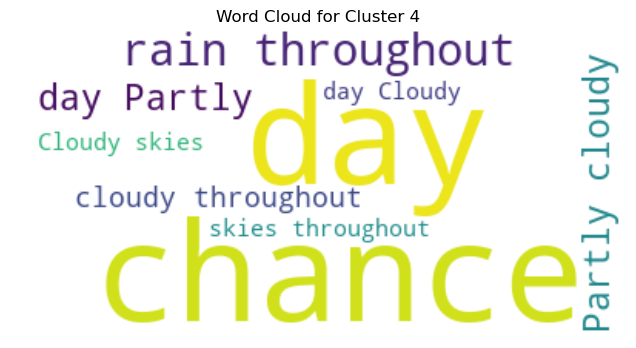

In [93]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==4]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 4')
plt.show()

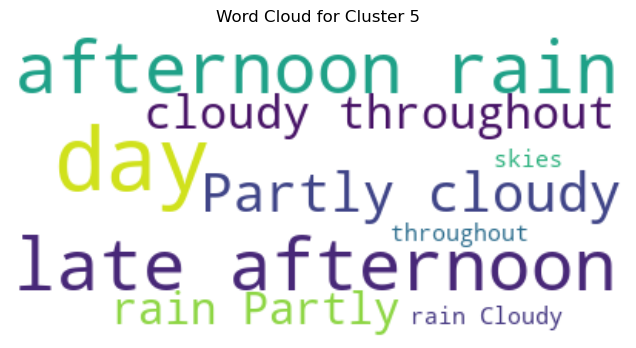

In [94]:
text = ' '.join(description for description in df_manila[df_manila['clusters_description']==5]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 5')
plt.show()

In [95]:
df_manila = df_manila.drop(columns=['description'])
df_manila.head(2)

,name,datetime,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,preciptype_clusters,clusters_description
0,"Manila, Phillipines",2014-01-01,26.6,32.7,23.0,27.4,20.4,70.1,0.0,0,0.0,rain,0.0,0.0,35.457647,22.3,98.4,1013.2,47.6,8.8,209.0,18.0,8,25.423434,2014-01-01T06:21:07,2014-01-01T17:37:49,0.00,0,1
1,"Manila, Phillipines",2014-01-02,27.0,33.1,23.6,27.9,20.0,66.2,0.0,0,0.0,rain,0.0,0.0,35.457647,20.5,100.4,1012.9,45.4,10.2,223.6,19.1,8,25.423434,2014-01-02T06:21:29,2014-01-02T17:38:24,0.02,0,1


## Download of updated dataframe

In [ ]:
# folder_path = r'C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data'
# file_name = 'manila_weather_2014-2024_updated.csv'
# full_path = os.path.join(folder_path, file_name)

# # save the DataFrame to the specified path
# df_manila.to_csv(full_path)